# Лабораторная работа №2

_Цель работы_ - изучить аналитический (обратной матрицы) и численный (Брауна-Робинсона) методы нахождения смешанных стратегий в антагонистической игре двух лиц в нормальной форме.

## Постановка задачи и методические указания

Найдите цену игры и оптимальные стратегии обоих игроков методами обратной матрицы и Брауна-Робинсон. Сравните полученные результаты.

Отчет должен содержать: титульный лист; цель работы; постановку задачи; решение матричной игры аналитическим методом; этапы решения матричной игры в смешанных стратегиях численным методом Брауна-Робинсон за обоих игроков (в виде таблицы и графиков) до уровня погрешности $\varepsilon \leq 0,1$; сравнительную оценку погрешностей, полученных аналитически и приближенным решением.

### Вариант 5

### Ход работы

In [1]:
from IPython.display import display, Math, Latex
pretty_print_default(False)

Зададим матрицу игры:

In [2]:
C = matrix(SR, 3, 3, [8, 12, 10, 1, 6, 19, 17, 11, 11])
display(Math(latex(C)))

<IPython.core.display.Math object>

Стратегии игрока $A$:

In [3]:
x = C.rows()
Math(latex(table(x)))

<IPython.core.display.Math object>

Стратегии игрока $B$:

In [4]:
y = C.columns()
Math(latex(table(y)))

<IPython.core.display.Math object>

### Аналитический метод

Цена игры ищется по формуле $v = \frac{1}{u \cdot C^{-1} \cdot u^{T}}$:

In [5]:
u = matrix(SR, 1, C.nrows(), [1] * C.nrows())
v = (1/(u * C^(-1) * u.transpose()))
Math(latex(v))

<IPython.core.display.Math object>

Оптимальные стратегии игрока $A$ можно найти по формуле $x^{*} = \frac{u \cdot C^{-1}}{u \cdot C^{-1} \cdot u^{T}}$:

In [6]:
x_star = v * (u * C^(-1))
Math(latex(x_star))

<IPython.core.display.Math object>

Оптимальные стратегии игрока $B$ можно найти по формуле $y^{*} = \frac{C^{-1} \cdot u^{T}}{u \cdot C^{-1} \cdot u^{T}}$:

In [7]:
y_star = v * (C^(-1) * u.transpose()).transpose()
Math(latex(y_star))

<IPython.core.display.Math object>

### Метод Брауна-Робинсон

Верхняя и нижняя оценки игр:

$$\overline{v}[k] = \max_{i \in A} \sum_{j \in B}c_{ij} \tilde{y}_{j}[k] = \sum_{j \in B}c_{i[k + 1]j}\tilde{y}_{j}[k]$$

$$\underline{v}[k] = \max_{i \in A} \sum_{i \in A}c_{ij} \tilde{x}_{j}[k] = \sum_{i \in A}c_{i[k + 1]j}\tilde{x}_{j}[k]$$

Для оценки игры имеем:

$$\max_{k} \frac{1}{k} \underline{v}[k] \leq v \leq \min_{k} \frac{1}{k} \overline{v}[k]$$

Оценка погрешности:

$$\varepsilon [k] = \min_{k} \frac{1}{k} \overline{v}[k] - \max_{k} \frac{1}{k} \underline{v}[k]$$

In [8]:
def BrownRobinson(C, eps):
    x = C.rows()
    y = C.columns()

    ki, xk, yk, ei = 1, 0, 0, eps + 1

    winA = [0] * C.nrows()
    lossB = [0] * C.ncols()

    vxk, vyk = dict(), dict()
    v, vx, vy = [], [], []
    for i in range(C.nrows()):
        vxk[i], vyk[i] = 0, 0

    rows = [[
        '$k$', 
        'Выбор игрока $A$', 
        'Выбор игрока $B$', 
        'Выигрыш $A$', 
        'Проигрыш $B$', 
        '$\\overline{v}^{k}$', 
        '$\\underline{v}^{k}$', 
        '$\\varepsilon$', 
        '$v$'
    ]]
    while ei > eps:
        winA = [xi + yi for xi, yi in zip(winA, y[yk])]
        lossB = [xi + yi for xi, yi in zip(lossB, x[xk])]

        maxX, minY = max(winA), min(lossB)

        vxk[xk] += 1
        vyk[yk] += 1
        vx.append(maxX / ki)
        vy.append(minY / ki)
        ei = min(vx) - max(vy)
        v.append((min(vx) + max(vy)) / 2)
        rows.append([ki, xk + 1, yk + 1, winA, lossB, vx[-1], vy[-1], ei, v[-1]])

        countX = winA.count(maxX)
        countY = lossB.count(minY)

        xk = winA.index(maxX)
        yk = lossB.index(minY)

        if countX > 1 and countY > 1:
            pass
        elif countX == 1 and countY > 1:
            if lossB[xk] == minY:
                yk = xk
        elif countY == 1 and countX > 1:
            if winA[yk] == maxX:
                xk = yk
        ki += 1
    x_strategies = matrix(1, 3, [i / (ki - 1) for i in vxk.values()])
    y_strategies = matrix([i / (ki - 1) for i in vyk.values()])
    return v[-1], x_strategies, y_strategies, rows

cost, x_strategies, y_strategies, rows = BrownRobinson(C, 1/10)
display(Math(latex(table(rows))))

<IPython.core.display.Math object>

Построим графики:

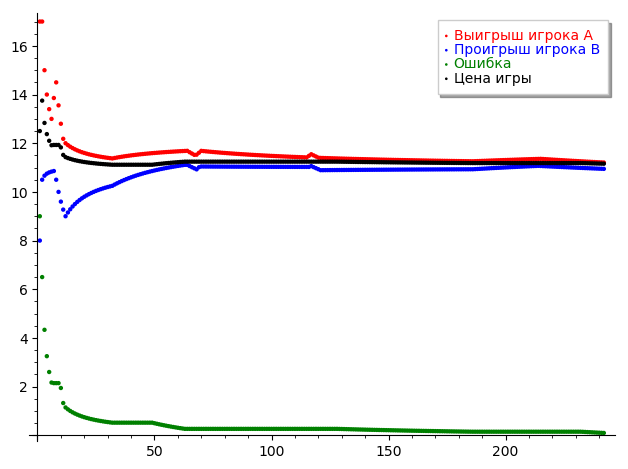

In [9]:
from sage.plot.point import Point
a_points = point(
    [(row[0], row[5]) for row in rows[1:]], 
    rgbcolor='red', 
    legend_label='Выигрыш игрока A', 
    legend_color='red'
)
b_points = point(
    [(row[0], row[6]) for row in rows[1:]], 
    rgbcolor='blue', 
    legend_label='Проигрыш игрока B', 
    legend_color='blue'
)
e_points = point(
    [(row[0], row[7]) for row in rows[1:]], 
    rgbcolor='green', 
    legend_label='Ошибка', 
    legend_color='green'
)
v_points = point(
    [(row[0], row[8]) for row in rows[1:]], 
    rgbcolor='black', 
    legend_label='Цена игры', 
    legend_color='black'
)

a_points + b_points + e_points + v_points

Оптимальные стратегии для игрока $A$:

In [10]:
Math(latex(x_strategies))

<IPython.core.display.Math object>

Оптимальные стратегии для игрока $B$:

In [11]:
Math(latex(y_strategies))

<IPython.core.display.Math object>

Цена игры:

In [12]:
Math(latex(cost))

<IPython.core.display.Math object>